In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
df = pd.read_csv("csv/new_csv/cleaned_data.csv")
df.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,daewoo,2003,200000.0,89.0,121.0,Gasoline,9.0,236.0,Manual,199.0,EUR,Germany,0.0,NaN,unknown,unknown,199.0
1,volkswagen golf,volkswagen,1994,222275.0,55.0,75.0,Gasoline,0.0,0.0,Manual,200.0,EUR,Germany,0.0,NaN,unknown,unknown,200.0
2,ford fiesta,ford,2001,153000.0,44.0,60.0,Gasoline,7.3,171.0,Manual,290.0,EUR,Germany,0.0,NaN,unknown,unknown,290.0
3,volkswagen polo,volkswagen,1999,154000.0,44.0,60.0,Gasoline,6.3,151.0,Manual,350.0,EUR,Germany,0.0,NaN,unknown,unknown,350.0
4,nissan micra,nissan,1998,140000.0,40.0,54.0,Gasoline,6.0,152.0,Manual,380.0,EUR,Germany,0.0,NaN,unknown,unknown,380.0


In [21]:
df = df.drop(["price", "currency"], axis=1)

In [23]:
df_nan = df[df.engine_power_kW > 0].drop(["country","engine_size","nr_of_accidents","color_exterior","color_interior"], axis=1)
df_nan

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,price_eur
0,daewoo rezzo,daewoo,2003,200000.0,89.0,121.0,0,9.0,236.0,Manual,199.0
1,volkswagen golf,volkswagen,1994,222275.0,55.0,75.0,0,0.0,0.0,Manual,200.0
2,ford fiesta,ford,2001,153000.0,44.0,60.0,0,7.3,171.0,Manual,290.0
3,volkswagen polo,volkswagen,1999,154000.0,44.0,60.0,0,6.3,151.0,Manual,350.0
4,nissan micra,nissan,1998,140000.0,40.0,54.0,0,6.0,152.0,Manual,380.0
...,...,...,...,...,...,...,...,...,...,...,...
353,renault megane,renault,2010,96133.0,81.0,110.0,1,4.4,110.0,Automatic,5190.0
354,opel corsa,opel,2012,91158.0,64.0,87.0,0,5.7,135.0,Manual,5200.0
355,toyota yaris,toyota,2010,94200.0,51.0,69.0,0,5.0,115.0,Manual,5200.0
356,bmw 116,bmw,2008,164145.0,90.0,122.0,0,NaN,NaN,Manual,5280.0


In [27]:
gearbox = df.gearbox.unique()
gearbox = dict(zip(gearbox, range(len(gearbox))))

fuels = df.fuel_type.unique()
fuels = dict(zip(fuels, range(len(fuels))))

marks = df.mark.unique()
marks = dict(zip(marks, range(len(marks))))

color_exterior = df.color_exterior.unique()
color_exterior = dict(zip(color_exterior, range(len(color_exterior))))

color_interior = df.color_interior.unique()
color_interior = dict(zip(color_interior, range(len(color_interior))))

df = df.replace({'gearbox': gearbox, 'fuel_type': fuels, "color_exterior":color_exterior,
                "mark":marks, "color_interior":color_interior})
df.head()

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,0,2003,200000.0,89.0,121.0,0,9.0,236.0,0,Germany,0.0,NaN,0,0,199.0
1,volkswagen golf,1,1994,222275.0,55.0,75.0,0,0.0,0.0,0,Germany,0.0,NaN,0,0,200.0
2,ford fiesta,2,2001,153000.0,44.0,60.0,0,7.3,171.0,0,Germany,0.0,NaN,0,0,290.0
3,volkswagen polo,1,1999,154000.0,44.0,60.0,0,6.3,151.0,0,Germany,0.0,NaN,0,0,350.0
4,nissan micra,3,1998,140000.0,40.0,54.0,0,6.0,152.0,0,Germany,0.0,NaN,0,0,380.0


In [41]:
df = df[df.price_eur < 1600000]

In [42]:
df.price_eur.describe().to_frame()

,price_eur
count,1699.000000
mean,14185.759052
std,22608.300283
min,12.370000
25%,3990.000000
50%,9319.110000
75%,15708.595000
max,389000.000000


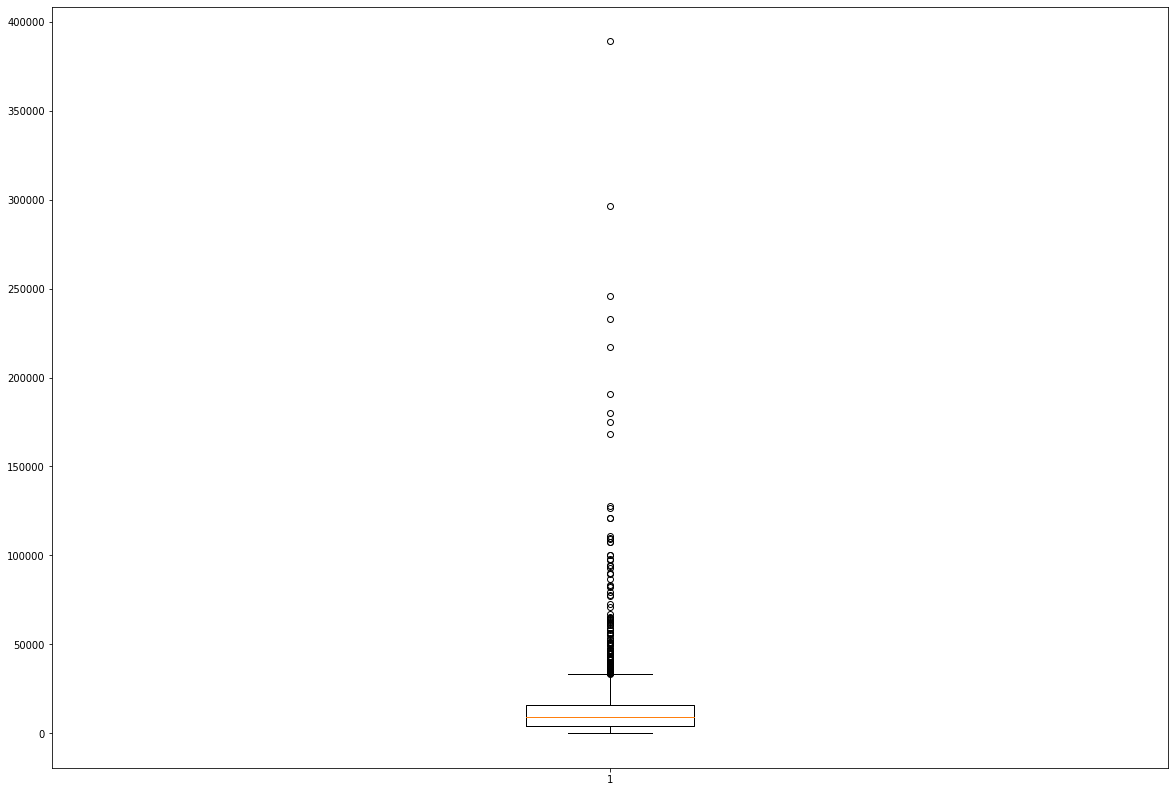

In [54]:
plt.figure(figsize= (20, 14))
plt.boxplot(df.price_eur)
plt.show()

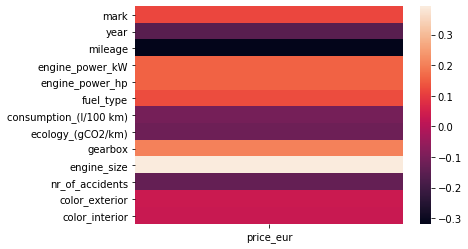

In [48]:
import seaborn as sns
sns.heatmap(df.corr().price_eur.to_frame().drop(["price_eur"], axis=0))

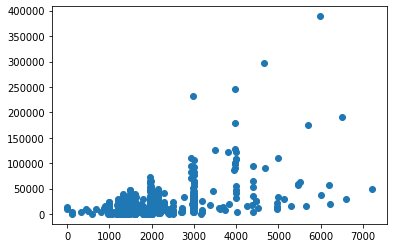

In [53]:
df_eng_size = df[df.engine_size > 0]
df_eng_size
plt.scatter(df_eng_size.engine_size, df_eng_size.price_eur)
plt.show()

In [144]:
df_eng_size.engine_size.describe().to_frame()

,engine_size
count,716.000000
mean,2059.490223
std,967.239955
min,1.000000
25%,1497.000000
50%,1968.000000
75%,2148.000000
max,7201.000000


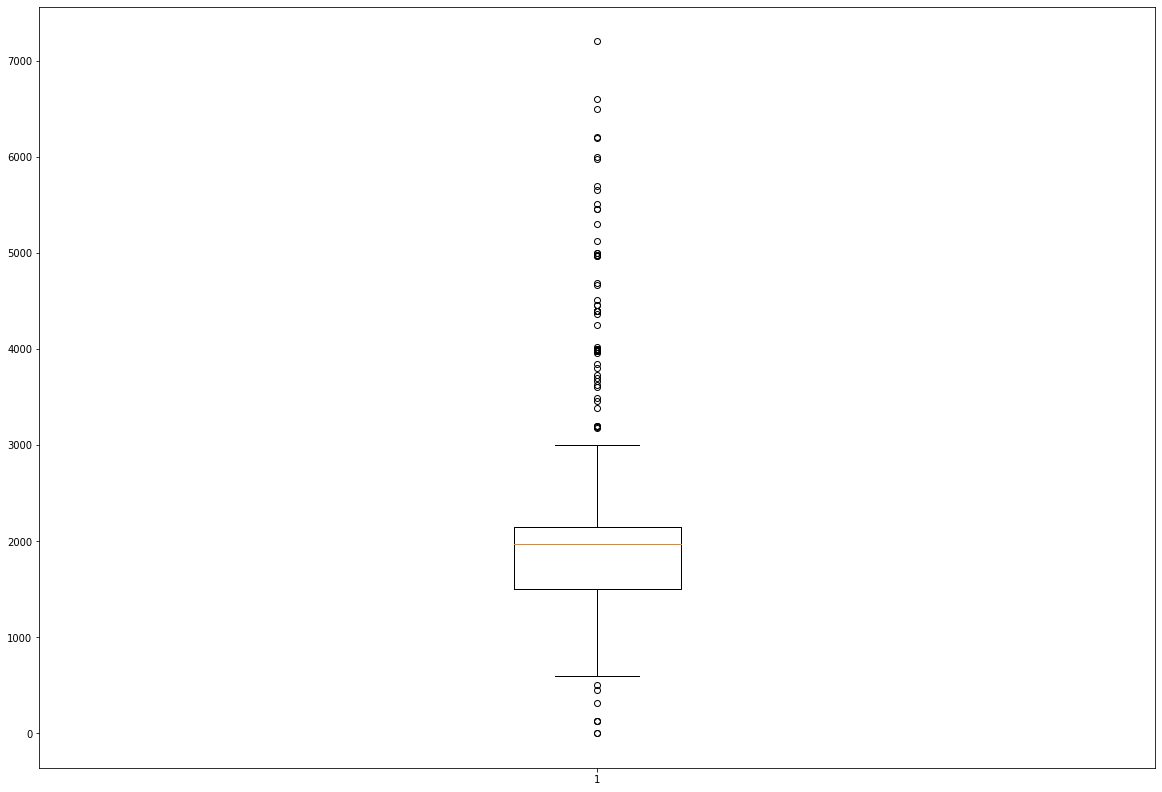

In [147]:
plt.figure(figsize= (20, 14))
plt.boxplot(df_eng_size.engine_size)
plt.show()

In [119]:
df_eng_test = df[df.engine_size == 0]
df_eng_test

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,0,2003,200000.0,89.0,121.0,0,9.0,236.0,0,Germany,0.0,NaN,0,0,199.00
1,volkswagen golf,1,1994,222275.0,55.0,75.0,0,0.0,0.0,0,Germany,0.0,NaN,0,0,200.00
2,ford fiesta,2,2001,153000.0,44.0,60.0,0,7.3,171.0,0,Germany,0.0,NaN,0,0,290.00
3,volkswagen polo,1,1999,154000.0,44.0,60.0,0,6.3,151.0,0,Germany,0.0,NaN,0,0,350.00
4,nissan micra,3,1998,140000.0,40.0,54.0,0,6.0,152.0,0,Germany,0.0,NaN,0,0,380.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,jeep grand cherokee limited 75th anniversary 4wd,35,2016,57999.0,NaN,NaN,5,NaN,NaN,3,United States,0.0,0.0,11,1,25317.87
1696,jeep compass latitude 4wd,35,2014,144794.0,NaN,NaN,5,NaN,NaN,3,United States,0.0,1.0,3,5,8849.83
1697,subaru forester 2.5x premium w/all-weather auto,71,2011,133878.0,NaN,NaN,5,NaN,NaN,3,United States,0.0,1.0,6,5,9735.26
1698,honda civic sport hatchback cvt,28,2017,58566.0,NaN,NaN,5,NaN,NaN,3,United States,0.0,0.0,2,1,16818.66


23.78893920179589
0.25636415808725344


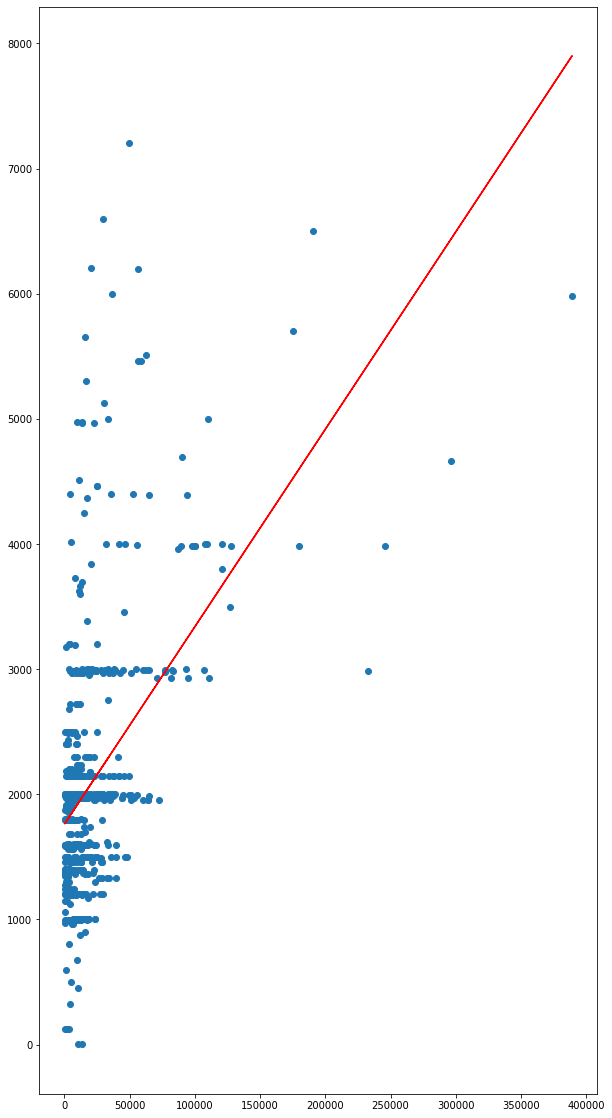

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

y = np.array(df_eng_size.engine_size).reshape(-1, 1)
x = np.array(df_eng_size.price_eur).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

rmse = np.sqrt(mean_absolute_error(y, y_pred))
r2 = r2_score(y,y_pred)
print(rmse)
print(r2)

plt.figure(figsize=(10,20))
plt.scatter(x, y)
plt.plot(x, y_pred, color="red")
plt.show()

27.980625720054892
-0.400956929292269


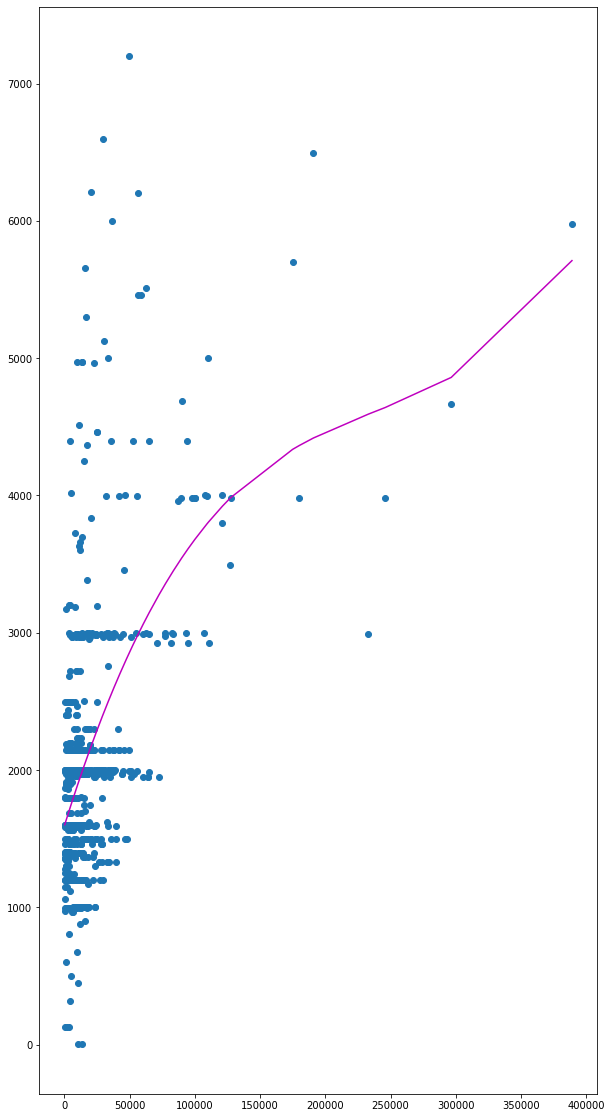

In [141]:
y = np.array(df_eng_size.engine_size).reshape(-1, 1)
x = np.array(df_eng_size.price_eur).reshape(-1, 1)

pf = PolynomialFeatures(degree=3).fit_transform(x)
lr = LinearRegression().fit(pf, y)
y_pred = lr.predict(pf)

rmse = np.sqrt(mean_absolute_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.figure(figsize=(10,20))
plt.scatter(x, y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [151]:
y = np.array(df_eng_size.engine_size).reshape(-1, 1)
x = np.array(df_eng_size.price_eur).reshape(-1, 1)

y_to_predict = np.array(df_eng_test.price_eur).reshape(-1, 1)

reg = LinearRegression().fit(x, y)
y_pred = reg.predict(y_to_predict)
y_pred = [ round(float(i), 1) for i in y_pred ]

df_eng_test.loc[:, ["engine_size"]] = y_pred
df_eng_test.head()

R:\Work\Anacond\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_(l/100 km),ecology_(gCO2/km),gearbox,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
0,daewoo rezzo,0,2003,200000.0,89.0,121.0,0,9.0,236.0,0,Germany,1762.2,NaN,0,0,199.0
1,volkswagen golf,1,1994,222275.0,55.0,75.0,0,0.0,0.0,0,Germany,1762.3,NaN,0,0,200.0
2,ford fiesta,2,2001,153000.0,44.0,60.0,0,7.3,171.0,0,Germany,1763.7,NaN,0,0,290.0
3,volkswagen polo,1,1999,154000.0,44.0,60.0,0,6.3,151.0,0,Germany,1764.6,NaN,0,0,350.0
4,nissan micra,3,1998,140000.0,40.0,54.0,0,6.0,152.0,0,Germany,1765.1,NaN,0,0,380.0
